**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Topic 10: Principal Coordinates Analysis (PCoA)

Rather than using raw data as in a CA, PCoA takes a (dis)similarity matrix as input; in other words, any of the dissimilarities calculated by **vegan**’s `vegdist()` function can be used, which is great as they are well-suited to species data. If dissimilarities are Euclidean distances, then PCoA is equal to PCA. Another thing that makes a PCoA more useful is that (dis)similarity matrices calculated from quantitative, semi-quantitative, qualitative, and mixed variables can be handled.

Multidimensional scaling takes a set of dissimilarities and returns a set of points such that when plotted in 2D or 3D space the distances between the points are approximately equal to the dissimilarities.

## Set-up the analysis environment

In [1]:
library(tidyverse)
library(vegan)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## The Doubs River data

This time we work with the species data:

In [2]:
spe <- read.csv("../Num_Ecol_R_book_ed1/DoubsSpe.csv")
spe <- dplyr::select(spe, -1)
spe <- dplyr::slice(spe, -8)

## Calculate a suitable dissimilarity matrix

In [3]:
spe_bray <- vegdist(spe)

## Do the PCoA

The **vegan** function `cmdscale()` can be used for PCoA:

In [4]:
spe_pcoa <- cmdscale(spe_bray, k = nrow(spe) - 1, eig = TRUE)

Warning message in cmdscale(spe_bray, k = nrow(spe) - 1, eig = TRUE):
“only 17 of the first 28 eigenvalues are > 0”


The results are different from before, so let's see what's inside:

In [5]:
str(spe_pcoa)

List of 5
 $ points: num [1:29, 1:17] -0.3204 -0.5027 -0.4721 -0.3163 0.0666 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : NULL
 $ eig   : num [1:29] 3.695 1.098 0.71 0.415 0.305 ...
 $ x     : NULL
 $ ac    : num 0
 $ GOF   : num [1:2] 0.96 1


The important piece of this output to consider is **eig**, which is the *n* eigenvalues computed during the scaling process (see `?cmdscale`); their meaning is as before in PCA and CA, i.e. the proportion of a given eigenvalue to the sum of all eigenvalues reveals the relative 'importance' of each axis. The rest of the output we have seen in the earlier ordinations (PCA and CA) is missing because information about original variables are not available. This is due to the fact that input into `cmdscale()` is the square (site × site) dissimilarity matrix produced for the species table, not the raw species table itself.

Results produced by `summary()` are now not available. We can now calculate the proportion of variation explained by each axis, or proceed with plotting the ordination diagrams.

The percentage inertia explained by the first three axes is:

In [6]:
round(sum(spe_pcoa$eig[1:3]) / sum(spe_pcoa$eig) * 100, 2)

[1] 81.4

We can also use the `pcoa()` function to achieve the same:

In [7]:
library(ape)
spe_pcoa2 <- pcoa(spe_bray)
str(spe_pcoa2)

List of 5
 $ correction: chr [1:2] "none" "1"
 $ note      : chr "No correction was applied to the negative eigenvalues"
 $ values    :'data.frame':	29 obs. of  6 variables:
  ..$ Eigenvalues   : num [1:29] 3.695 1.098 0.71 0.415 0.305 ...
  ..$ Relative_eig  : num [1:29] 0.5465 0.1624 0.1051 0.0614 0.045 ...
  ..$ Rel_corr_eig  : num [1:29] 0.4332 0.1343 0.0897 0.0557 0.043 ...
  ..$ Broken_stick  : num [1:29] 0.1441 0.1071 0.0886 0.0762 0.067 ...
  ..$ Cum_corr_eig  : num [1:29] 0.433 0.568 0.657 0.713 0.756 ...
  ..$ Cumul_br_stick: num [1:29] 0.144 0.251 0.34 0.416 0.483 ...
 $ vectors   : num [1:29, 1:17] -0.3204 -0.5027 -0.4721 -0.3163 0.0666 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:29] "1" "2" "3" "4" ...
  .. ..$ : chr [1:17] "Axis.1" "Axis.2" "Axis.3" "Axis.4" ...
 $ trace     : num 6.76
 - attr(*, "class")= chr "pcoa"


The output differes, but the important one, **Eigenvalues**, can be found in the output.

See *Numerical Ecology in R* for details (pp. 140 to 145) for information about the interpretation of a PCoA and the ordination diagrams shown below.

## Ordination diagrams



We manually assemble an ordination plot with the `ordiplot()` function:

species scores not available



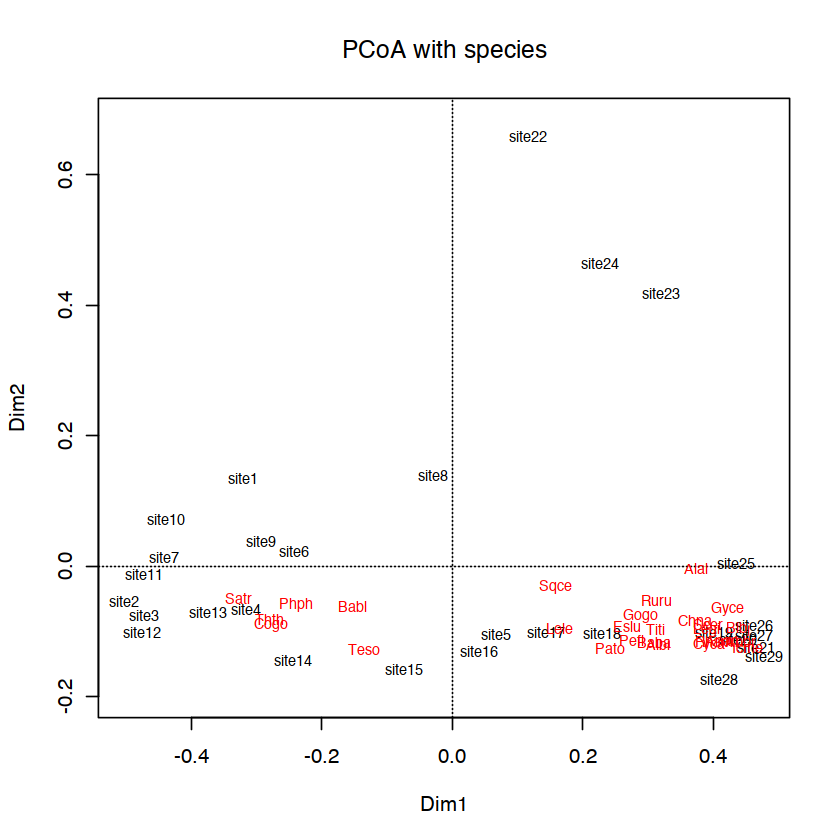

In [8]:
# add sites as weighted averages
ordiplot(scores(spe_pcoa), type = "t", main = "PCoA with species")
abline(h = 0, lty = 3)
abline(v = 0, lty = 3)
# add species
spe_wa <- wascores(spe_pcoa$points[, 1:2], spe)
text(spe_wa, rownames(spe_wa), cex = 0.7, col = "red")

The biplot for the ordination produced with `pcoa()` is given next:

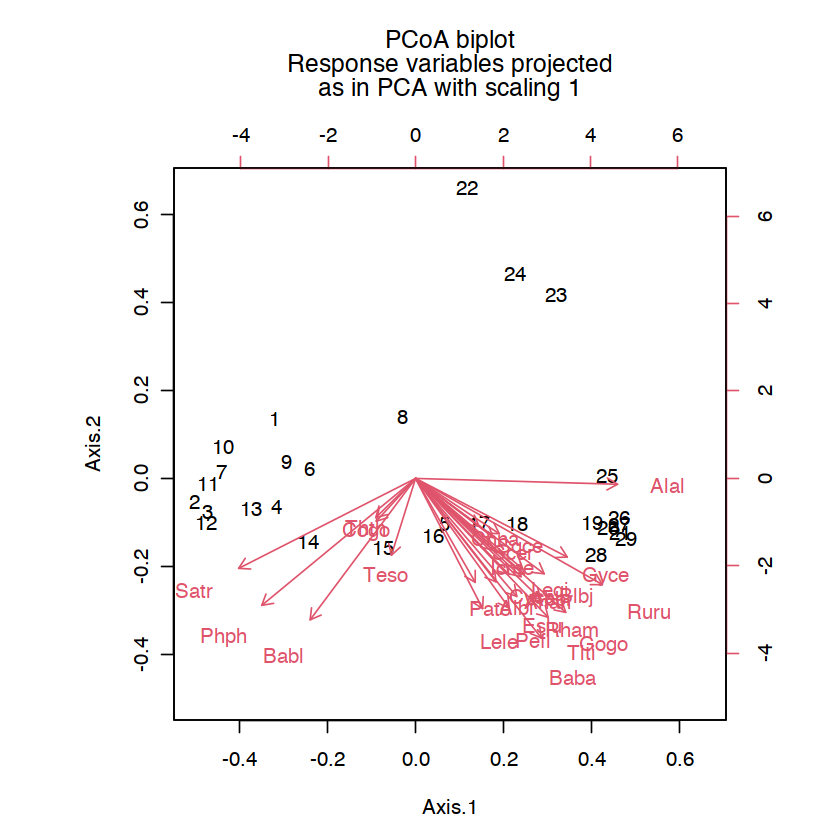

In [9]:
biplot.pcoa(spe_pcoa2, spe)